In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Reading the data

In [2]:
df = pd.read_csv('../input/mushroom-classification/mushrooms.csv')

Quick glance of data

In [3]:
print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.describe())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Visualising the target variable

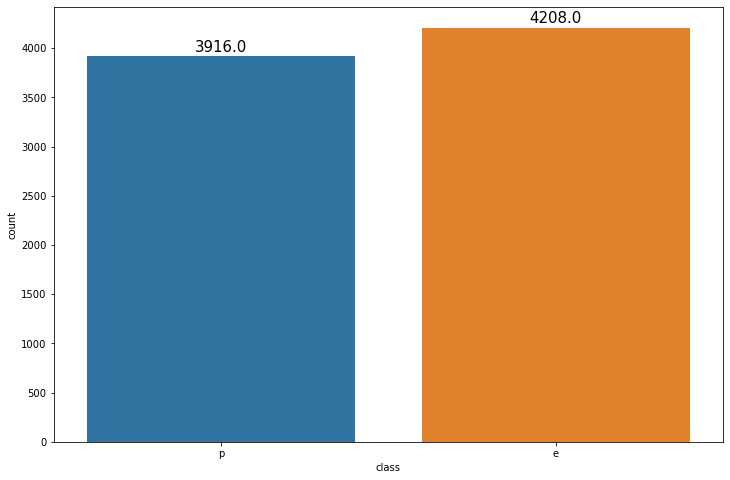

In [4]:
plt.figure(figsize=(12,8))
s = sns.countplot(x='class',data=df)
for p in s.patches:
    s.annotate(format(p.get_height(),'.1f'),
              (p.get_x() + p.get_width() /2. , p.get_height()),
               ha='center',va='center',fontsize=15,xytext=(0,9), textcoords='offset points'
              )

It can be concluded that the data is fairly distributed and biasness is not observed.

In [5]:
columns = df.columns
print(columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


Visualising features of the dataset

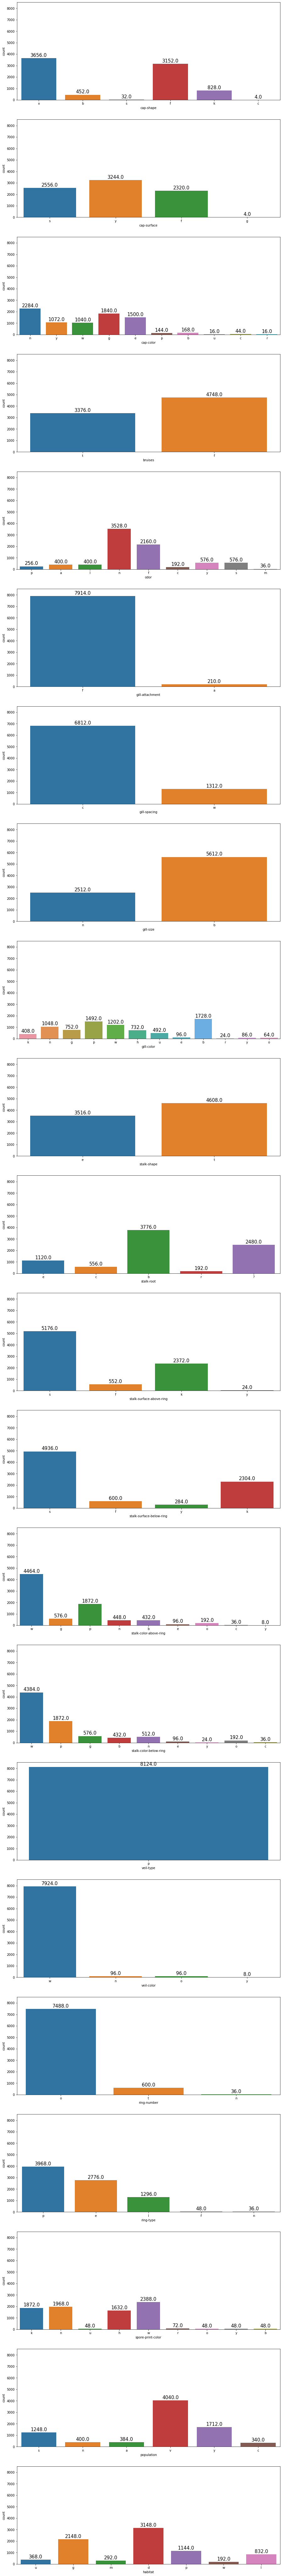

In [6]:
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True)
k=0
for i in range(0,22):
    k = k+1
    s = sns.countplot(x=columns[k],data=df,ax=axes[i])
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')
  

As veil type is only 'p' (singular value) throughout the dataframe it can be dropped.

In [7]:
df = df.drop('veil-type',axis=1)

In [8]:
#Reassigning because one feature was dropped from the dataframe
columns = df.columns

Visualising entire dataset with respect to target variable(class=poisonous or class=edible).

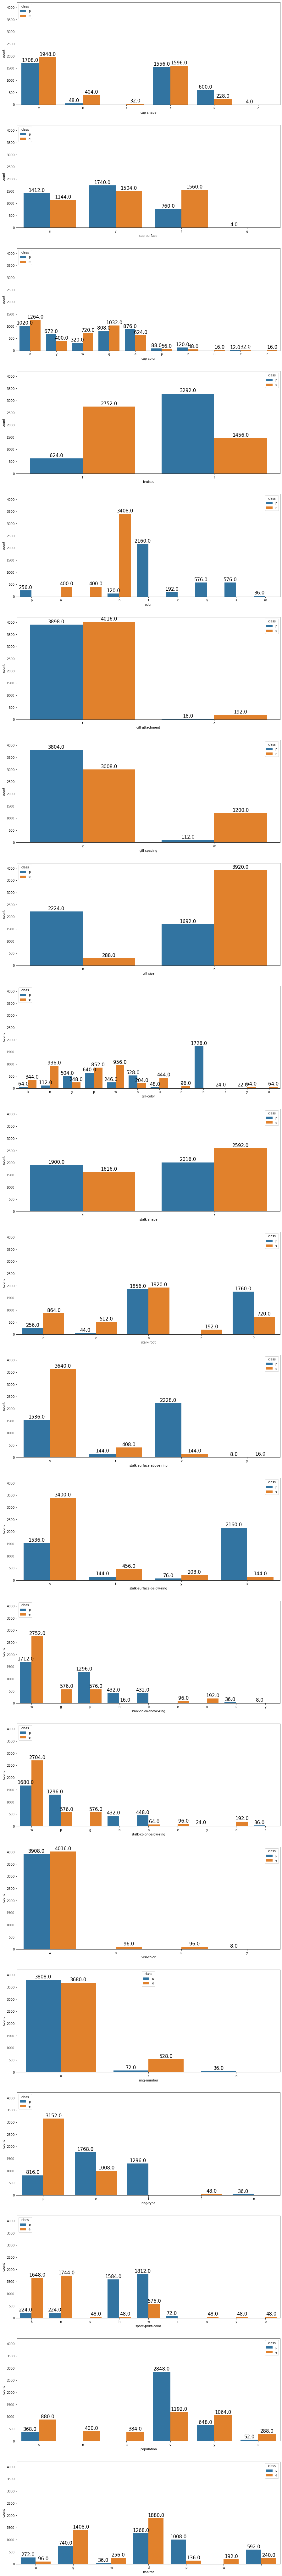

In [9]:
f, axes = plt.subplots(21,1, figsize=(15,150), sharey = True)
k=0
for i in range(0,21):
    k = k+1
    s = sns.countplot(x=columns[k],data=df,ax=axes[i],hue='class')
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')
  

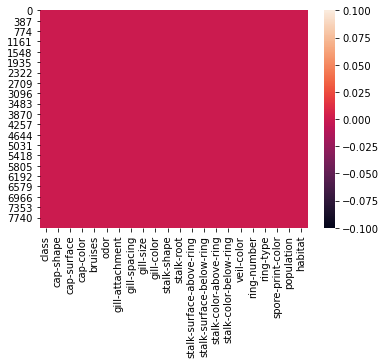

In [10]:
#Checking for null values
sns.heatmap(df.isnull())

Importing sklearn libraries

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [12]:
#Getting data ready to use for model training
final_df = pd.get_dummies(df,drop_first=True)

In [13]:
print(final_df.head())
print('\n')
print(final_df.info())
print('\n')

   class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        1            0            0            0            0            1   
1        0            0            0            0            0            1   
2        0            0            0            0            0            0   
3        1            0            0            0            0            1   
4        0            0            0            0            0            1   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0              0              1              0            0  ...   
1              0              1              0            0  ...   
2              0              1              0            0  ...   
3              0              0              1            0  ...   
4              0              1              0            0  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0             0             1             0 

In [14]:
X = final_df.drop('class_p',axis=1) #Everything except target
y = final_df['class_p'] #Only target

#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Instanting model

In [15]:
rfc = RandomForestClassifier()

Fitting data

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

Predicting values of X_test

In [17]:
pred_rfc = rfc.predict(X_test)

Analysing model performance

In [18]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test,pred_rfc))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test,pred_rfc))
print('\n')
print('ACCURACY')
print(accuracy_score(y_test,pred_rfc))

CONFUSION MATRIX
[[1378    0]
 [   0 1303]]


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



ACCURACY
1.0


Accuracy of **100%** is achieved using Random Forest Classifier